SCHEMITH JEREMIE --- DEVOIR 3 --- EXERCICE 2 : KERAS ET TENSORFLOW

2.2.2 - Réimplanter une solution en utilisant cette fois-ci scikit-learn et en tentant de trouver la
meilleure architecture du PMC. Tracer sa courbe d’apprentissage

Ici nous allons ouvrir le dataset fashion_minst depuis openML en utilisant la
fonction fetch_openml de SciKit Learn

In [1]:
import warnings
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import fetch_openml
from sklearn.exceptions import ConvergenceWarning
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier

# On charge le dataset depuis https://www.openml.org/d/554
X, y = fetch_openml(
    "Fashion-MNIST", return_X_y=True, as_frame=False, parser="pandas"
)
X = X / 255.0 #On transforme les niveeaux de gris entre 0 et &
y = y.astype(np.uint8) # On transforme le type object en uint8
# Séparation données d'entrainement / test
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.15)



In [2]:
X_train.shape

(59500, 784)

In [3]:
X_train_reshaped = X_train.reshape((X_train.shape[0],28,28))

In [4]:
# Séparation données d'entrainement / validation
X_valid, X_train = X_train[:5000], X_train[5000:]
y_valid, y_train = y_train[:5000], y_train[5000:]


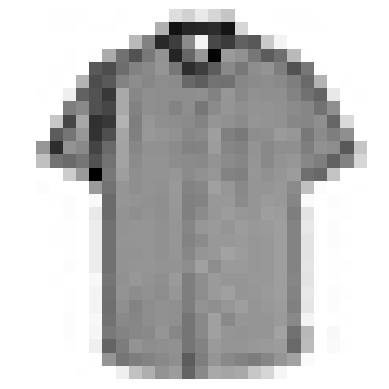

In [5]:
plt.imshow(X_train_reshaped[3], cmap="binary")
plt.axis('off')
plt.show()

In [6]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]
class_names[y_train[0]]

'Trouser'

Le jeu de validation contient 5000 images et le jeu de test 10500

In [7]:
X_valid.shape

(5000, 784)

In [8]:
X_test.shape

(10500, 784)

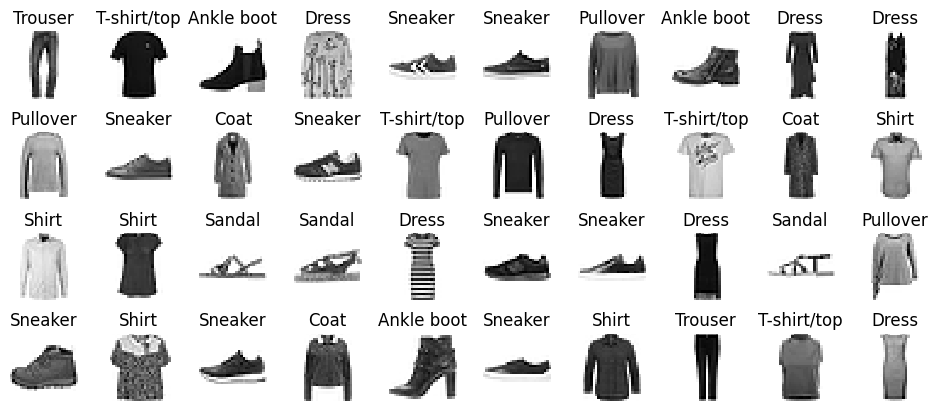

In [9]:
n_rows = 4
n_cols = 10
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
X_train_reshaped = X_train.reshape((X_train.shape[0],28,28))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_train_reshaped[index], cmap="binary", interpolation="nearest")
        plt.axis('off')
        plt.title(class_names[y_train[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

In [10]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from itertools import product

mlp = MLPClassifier(solver='sgd',random_state=42)

hidden_layer_sizes = [(n,) for n in range(10, 101, 10)]

all_hidden_layers = []

for num_layers in range(2, 6):
    for layers in product(hidden_layer_sizes, repeat=num_layers):
        flattened_layers = sum(layers, ())
        if sum(flattened_layers) >= 20:
            all_hidden_layers.append(flattened_layers)

activation_options = ['tanh', 'relu']
solver_options = ['sgd', 'adam']
max_iter_options = [1000, 3500]
learning_rate_options = ['constant','adaptive']

parameter_space = {
        'hidden_layer_sizes': all_hidden_layers,
        'activation': activation_options,
        'solver': solver_options,
        'max_iter': max_iter_options,
        'learning_rate': learning_rate_options,
    }

clf = RandomizedSearchCV(mlp, parameter_space, n_jobs=-1, cv=3)

clf.fit(X_train,y_train)

clf.best_params_


{'solver': 'adam',
 'max_iter': 1000,
 'learning_rate': 'constant',
 'hidden_layer_sizes': (80, 30, 100, 80, 70),
 'activation': 'relu'}

In [11]:
# Vu que la sortie est multi class on utilise une regression softmax pour l'activation de sortie
clf.out_activation = 'softmax'

In [12]:
from sklearn.metrics import accuracy_score

best_params = clf.best_params_

best_mlp = MLPClassifier(**best_params)
best_mlp.out_activation_ = 'softmax'

epochs = 21
accuracy_per_epoch = []
accuracy_per_epoch_val = []


subset_size = len(X_train) // epochs

X_val = X_valid
y_val = y_valid

for epoch in range(epochs):
    
    start_idx = epoch * subset_size
    end_idx = (epoch + 1) * subset_size


    X_subset = X_train[start_idx:end_idx]
    y_subset = y_train[start_idx:end_idx]
    
    history = best_mlp.fit(X_subset, y_subset)
    loss = history.loss_curve_
    
    y_pred = best_mlp.predict(X_train)
    accuracy = accuracy_score(y_train,y_pred)
    accuracy_per_epoch.append(accuracy)
    print(f'Epoch {epoch + 1}/{epochs} - Accuracy: {accuracy}')
    
    y_pred_val = best_mlp.predict(X_val)
    accuracy = accuracy_score(y_val,y_pred_val)
    accuracy_per_epoch_val.append(accuracy)
    print(f'Epoch {epoch + 1}/{epochs} - Accuracy validation: {accuracy}')

# Display the accuracy for each epoch
print("Accuracy for each epoch:", accuracy_per_epoch)

Epoch 1/21 - Accuracy: 0.8331559633027523
Epoch 1/21 - Accuracy validation: 0.8252
Epoch 2/21 - Accuracy: 0.8358348623853211
Epoch 2/21 - Accuracy validation: 0.823
Epoch 3/21 - Accuracy: 0.8331009174311926
Epoch 3/21 - Accuracy validation: 0.8212
Epoch 4/21 - Accuracy: 0.837394495412844
Epoch 4/21 - Accuracy validation: 0.8182
Epoch 5/21 - Accuracy: 0.8309724770642202
Epoch 5/21 - Accuracy validation: 0.8224
Epoch 6/21 - Accuracy: 0.8385871559633028
Epoch 6/21 - Accuracy validation: 0.8178
Epoch 7/21 - Accuracy: 0.8405688073394495
Epoch 7/21 - Accuracy validation: 0.8268
Epoch 8/21 - Accuracy: 0.8315229357798165
Epoch 8/21 - Accuracy validation: 0.8182
Epoch 9/21 - Accuracy: 0.842788990825688
Epoch 9/21 - Accuracy validation: 0.8374
Epoch 10/21 - Accuracy: 0.8440366972477065
Epoch 10/21 - Accuracy validation: 0.833
Epoch 11/21 - Accuracy: 0.8359082568807339
Epoch 11/21 - Accuracy validation: 0.8284
Epoch 12/21 - Accuracy: 0.8292293577981651
Epoch 12/21 - Accuracy validation: 0.8162
Ep

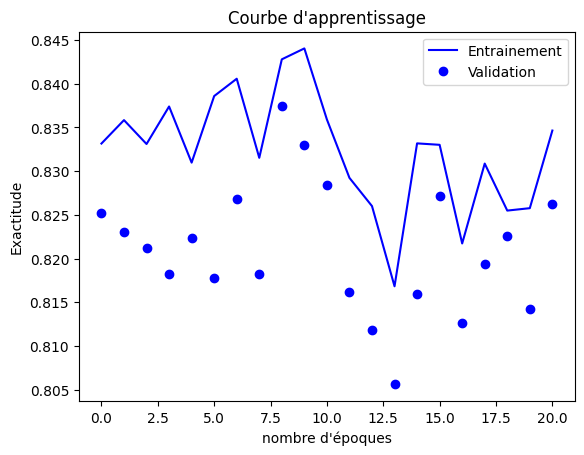

In [13]:
import matplotlib.pyplot as plt

plt.clf()
plt.plot( accuracy_per_epoch, 'b', label='Entrainement')
plt.plot( accuracy_per_epoch_val, 'bo', label='Validation')


plt.title('Courbe d\'apprentissage')
plt.xlabel('nombre d\'époques')
plt.ylabel('Exactitude')
plt.legend()
plt.show()

On remarque que l'apprentissage n'augmente pas avec le jeu de validation , on est sur un cas de surapprentissage 2

2.2.3 - Comparaison SciKit Learn / Keras

On remarque que l'on a une accuracy plus élevé avec keras qui est de l'ordre de 89% alors qu'avec SciKit Learn on a une accuracy qui est de l'ordre de 82%.

Le modèle Keras est donc mieux ajuster.

2.2.4 - Comparaison des temps d'entrainements

In [14]:
from sklearn.metrics import accuracy_score
import time

best_params = clf.best_params_

best_mlp = MLPClassifier(**best_params)
best_mlp.out_activation_ = 'softmax'

epochs = 100
time_per_epoch = []



subset_size = len(X_train) // epochs



for epoch in range(epochs//10):
    
    start_idx = 0
    end_idx = (epoch + 1) * subset_size


    X_subset = X_train[start_idx:end_idx]
    y_subset = y_train[start_idx:end_idx]
    
    start_time = time.time()
    best_mlp.fit(X_subset, y_subset)
    end_time = time.time()
    
    execution_time = end_time - start_time
    
    print(f'Subset Size for {(epoch + 1)} times ( 1 time = 350 rows ) - Execution time: {execution_time}')
    time_per_epoch.append(execution_time)


print("Time for each subset:", time_per_epoch)

Subset Size for 1 times ( 1 time = 350 rows ) - Execution time: 3.4848058223724365
Subset Size for 2 times ( 1 time = 350 rows ) - Execution time: 3.060724973678589
Subset Size for 3 times ( 1 time = 350 rows ) - Execution time: 11.55299425125122
Subset Size for 4 times ( 1 time = 350 rows ) - Execution time: 11.626360416412354
Subset Size for 5 times ( 1 time = 350 rows ) - Execution time: 18.94429063796997
Subset Size for 6 times ( 1 time = 350 rows ) - Execution time: 22.192660808563232
Subset Size for 7 times ( 1 time = 350 rows ) - Execution time: 24.747174501419067
Subset Size for 8 times ( 1 time = 350 rows ) - Execution time: 15.916321754455566
Subset Size for 9 times ( 1 time = 350 rows ) - Execution time: 33.380276918411255
Subset Size for 10 times ( 1 time = 350 rows ) - Execution time: 29.438152313232422
Time for each subset: [3.4848058223724365, 3.060724973678589, 11.55299425125122, 11.626360416412354, 18.94429063796997, 22.192660808563232, 24.747174501419067, 15.916321754

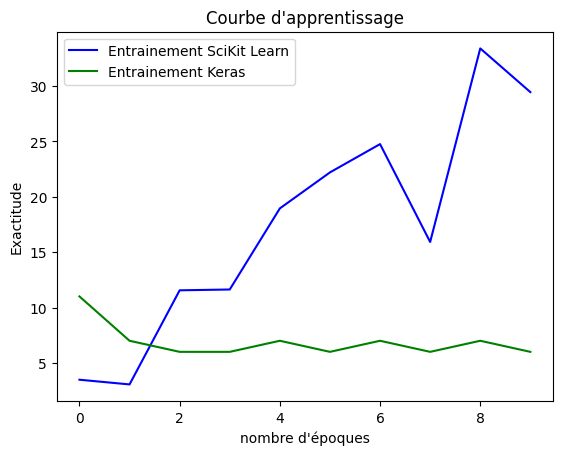

In [15]:
import matplotlib.pyplot as plt

# On récupère les valeurs pour chaque epoch du fichier ou l'on utilise Keras
time_per_epoch_keras = [11,7,6,6,7,6,7,6,7,6]
plt.clf()
plt.plot( time_per_epoch, 'b', label='Entrainement SciKit Learn')
plt.plot( time_per_epoch_keras, 'g', label='Entrainement Keras')


plt.title('Courbe d\'apprentissage')
plt.xlabel('nombre d\'époques')
plt.ylabel('Exactitude')
plt.legend()
plt.show()

On remarque que SciKit Learn prend bien plus de temps que Keras sachant qu'on a fait des plus petit batch_size avec
notre modèle SciKit Learn. 